In [12]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [21]:
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [24]:
X= df.iloc[:,:-1]
X.shape

(303, 13)

In [25]:
y = df['target']
y.shape

(303,)

### NN Architechture

In [39]:
model = tf.keras.models.Sequential()
norm = tf.keras.layers.Normalization()
norm.adapt(X)
model.add(norm)
model.add(tf.keras.layers.Dense(units=6,activation='relu',input_shape=(13,)))
model.add(tf.keras.layers.Dense(units=6,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

es = tf.keras.callbacks.EarlyStopping(patience=10)

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'],
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 13)               27        
 tion)                                                           
                                                                 
 dense_27 (Dense)            (None, 6)                 84        
                                                                 
 dense_28 (Dense)            (None, 6)                 42        
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 160
Trainable params: 133
Non-trainable params: 27
_________________________________________________________________


In [45]:
history = model.fit(x=X, y=y, batch_size=8, epochs=100, callbacks=[es],validation_split=.2, verbose=True)

Epoch 1/100
31/31 [==============================] - 0s 4ms/step - loss: 0.3845 - accuracy: 0.8430 - val_loss: 1.0428 - val_accuracy: 0.4426
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8595 - val_loss: 1.0434 - val_accuracy: 0.4426
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8595 - val_loss: 1.0402 - val_accuracy: 0.4426
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.8678 - val_loss: 1.0195 - val_accuracy: 0.4754
Epoch 5/100
31/31 [==============================] - 0s 6ms/step - loss: 0.3489 - accuracy: 0.8719 - val_loss: 1.0068 - val_accuracy: 0.4754
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.3406 - accuracy: 0.8678 - val_loss: 0.9908 - val_accuracy: 0.4918
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.3330 - accuracy: 0.8719 - val_loss: 0.9721 - val_accuracy: 0.5082
Epoch 8/100
3

In [41]:
df = pd.DataFrame(history.history)
df['epoch'] = history.epoch

<AxesSubplot:>

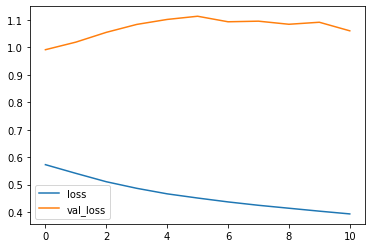

In [42]:
df[['loss','val_loss']].plot()

<AxesSubplot:>

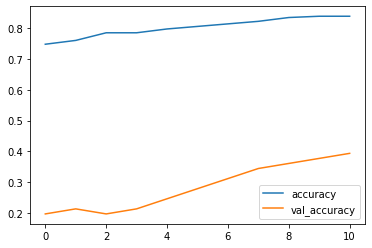

In [43]:
df[['accuracy','val_accuracy']].plot()

In [44]:
model.save('model_bekar_h')

INFO:tensorflow:Assets written to: model_bekar_h\assets
